# Titanic : Machine Learning from Disaster
Implementation using **some_fancy_feature_selection_here** feature selection and **some_fancy_classifier_here** classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
data_path = "data/"
data_train = pd.read_csv(data_path + "train.csv", delimiter=',')

cls = data_train["Survived"].values

In [3]:
train_df = data_train
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
one_hot_Pclass = pd.get_dummies(train_df["Pclass"])
for i in one_hot_Pclass.columns.values:
    train_df["Pclass"+str(i)] = one_hot_Pclass[i].values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Pclass1        891 non-null uint8
Pclass2        891 non-null uint8
Pclass3        891 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 86.2+ KB


In [5]:
one_hot_name = pd.get_dummies(map(lambda x: x.split(',')[1].split('.')[0].strip(), train_df["Name"]))
for i in one_hot_name:
    train_df["honorifics_"+i] = one_hot_name[i].values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Pclass                     891 non-null int64
Name                       891 non-null object
Sex                        891 non-null object
Age                        714 non-null float64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Ticket                     891 non-null object
Fare                       891 non-null float64
Cabin                      204 non-null object
Embarked                   889 non-null object
Pclass1                    891 non-null uint8
Pclass2                    891 non-null uint8
Pclass3                    891 non-null uint8
honorifics_Capt            891 non-null uint8
honorifics_Col             891 non-null uint8
honorifics_Don             891 non-null uint8
honorifics_Dr              891 non-null uint8
honorifics_J

In [6]:
one_hot_sex = pd.get_dummies(train_df["Sex"])
for i in one_hot_sex:
    train_df["Sex_"+i] = one_hot_sex[i].values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Pclass                     891 non-null int64
Name                       891 non-null object
Sex                        891 non-null object
Age                        714 non-null float64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Ticket                     891 non-null object
Fare                       891 non-null float64
Cabin                      204 non-null object
Embarked                   889 non-null object
Pclass1                    891 non-null uint8
Pclass2                    891 non-null uint8
Pclass3                    891 non-null uint8
honorifics_Capt            891 non-null uint8
honorifics_Col             891 non-null uint8
honorifics_Don             891 non-null uint8
honorifics_Dr              891 non-null uint8
honorifics_J

In [7]:
one_hot_embarked = pd.get_dummies(train_df["Embarked"])
for i in one_hot_embarked:
    train_df["Embarked_"+i] = one_hot_embarked[i].values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 37 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Pclass                     891 non-null int64
Name                       891 non-null object
Sex                        891 non-null object
Age                        714 non-null float64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Ticket                     891 non-null object
Fare                       891 non-null float64
Cabin                      204 non-null object
Embarked                   889 non-null object
Pclass1                    891 non-null uint8
Pclass2                    891 non-null uint8
Pclass3                    891 non-null uint8
honorifics_Capt            891 non-null uint8
honorifics_Col             891 non-null uint8
honorifics_Don             891 non-null uint8
honorifics_Dr              891 non-null uint8
honorifics_J

In [8]:
train_df["Age"] = train_df["Age"].fillna(data_train["Age"].mean())

train_df_drop = data_train.drop(["PassengerId" ,"Survived", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
train_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
Age                        891 non-null float64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Fare                       891 non-null float64
Pclass1                    891 non-null uint8
Pclass2                    891 non-null uint8
Pclass3                    891 non-null uint8
honorifics_Capt            891 non-null uint8
honorifics_Col             891 non-null uint8
honorifics_Don             891 non-null uint8
honorifics_Dr              891 non-null uint8
honorifics_Jonkheer        891 non-null uint8
honorifics_Lady            891 non-null uint8
honorifics_Major           891 non-null uint8
honorifics_Master          891 non-null uint8
honorifics_Miss            891 non-null uint8
honorifics_Mlle            891 non-null uint8
honorifics_Mme             891 non-null uint8
honorifics_Mr              891 non-null uint8
honorifics_Mrs   

In [9]:
ftr = train_df_drop.values
ftr

array([[22.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765,  1.        ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
def normFeature(x):
    x /= np.linalg.norm(x)
    x = x.tolist()
    return x
ftr = map(lambda x: normFeature(x), ftr)
ftr = np.array(ftr)

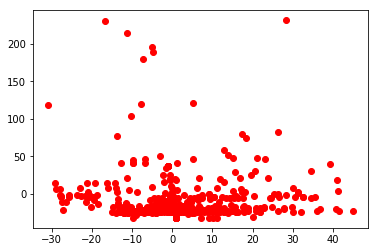

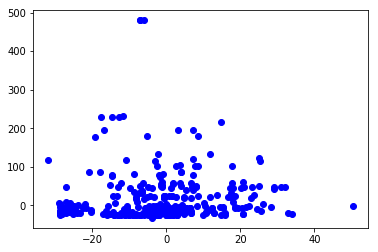

In [10]:
pca = PCA(n_components=2)
ftr_for_plot = pca.fit_transform(ftr)

plt.figure(0)
for i in range(len(ftr)):
    if cls[i] == 0:
        line = plt.plot(ftr_for_plot[i][1], ftr_for_plot[i][0], "ro")
        plt.setp(line, color="r", linewidth=2.0)

plt.figure(1)
for i in range(len(ftr)):
    if cls[i] == 1:
        line = plt.plot(ftr_for_plot[i][1], ftr_for_plot[i][0], "ro")
        plt.setp(line, color="b", linewidth=2.0)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
accuracy = []
other_metrics = []
kfold = KFold(n_splits=10)
n_fold = 0
for train_index, test_index in kfold.split(ftr):
    x_train, x_test = ftr[train_index], ftr[test_index]
    y_train, y_test = cls[train_index], cls[test_index]

#     clf = RandomForestClassifier(n_estimators=1000, oob_score=True).fit(x_train, y_train)
    clf = SVC(kernel="linear").fit(x_train, y_train)
    
    acc = clf.score(x_test, y_test)
    oth = precision_recall_fscore_support(y_test, clf.predict(x_test), average="macro")
    
    n_fold += 1
    print "Fold-" + str(n_fold) + " Accuracy: " + str(acc)
    
    accuracy.append(acc)
    other_metrics.append(oth)

print    
print "Average Accuracy: " + str(np.mean(accuracy))
print "Average Precision: " + str(np.mean([i[0] for i in other_metrics]))
print "Average Recall: " + str(np.mean([i[1] for i in other_metrics]))
print "Average F-Measure: " + str(np.mean([i[0] for i in other_metrics]))

Fold-1 Accuracy: 0.8111111111111111
Fold-2 Accuracy: 0.8539325842696629
Fold-3 Accuracy: 0.7865168539325843
Fold-4 Accuracy: 0.8764044943820225
Fold-5 Accuracy: 0.8089887640449438
Fold-6 Accuracy: 0.8202247191011236
Fold-7 Accuracy: 0.7528089887640449
Fold-8 Accuracy: 0.7752808988764045
Fold-9 Accuracy: 0.898876404494382
Fold-10 Accuracy: 0.8426966292134831

Average Accuracy: 0.8226841448189763
Average Precision: 0.8106598914640137
Average Recall: 0.8073036067164976
Average F-Measure: 0.8106598914640137
